In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
plt.rc('font', family='serif')
plt.rc('font', size=18)

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
print(data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
x = data['data']
y = data['target']

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler() 
x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

Text(0.5,1,'Target')

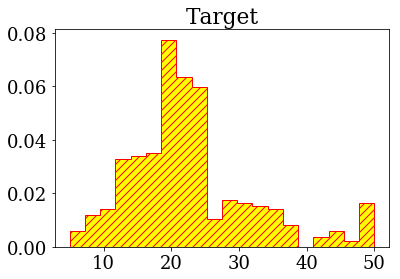

In [11]:
plt.hist(y_train, bins=20, normed=True, color='yellow', histtype='stepfilled', hatch='///', edgecolor='red')
plt.title('Target')

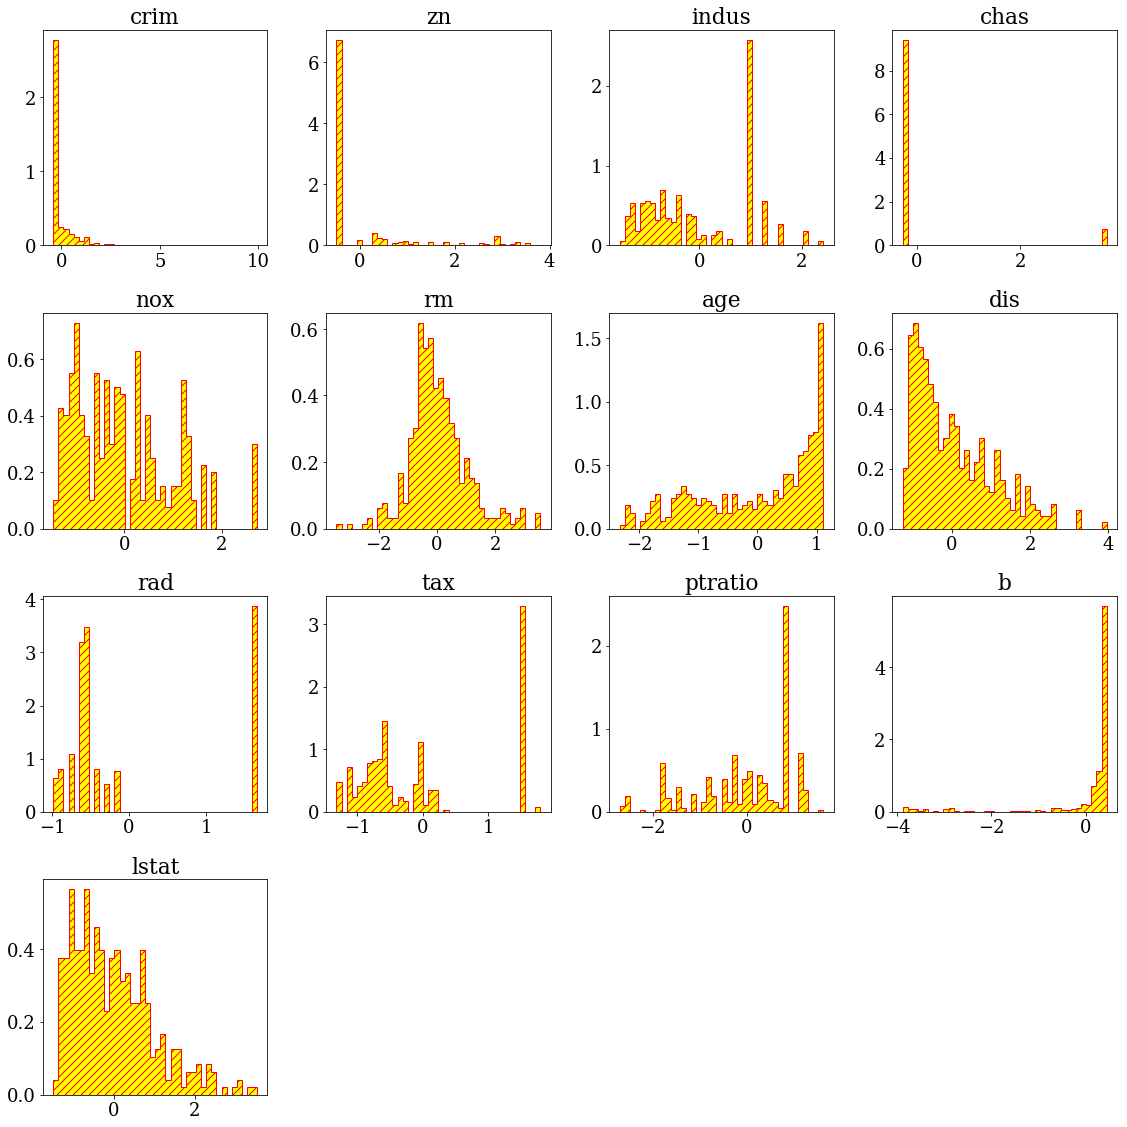

In [12]:
n_rows = 4
n_cols = 4

plt.figure(figsize=(16, 16))

for index, row in enumerate(x_train.transpose()):
    
    plt.subplot(n_rows, n_cols, index+1)
    plt.hist(row, bins=40, normed=True, color='yellow', histtype='stepfilled', hatch='///', edgecolor='red')
    plt.title(data['feature_names'][index].lower())
    
plt.tight_layout() 

In [13]:
from matplotlib.colors import LogNorm

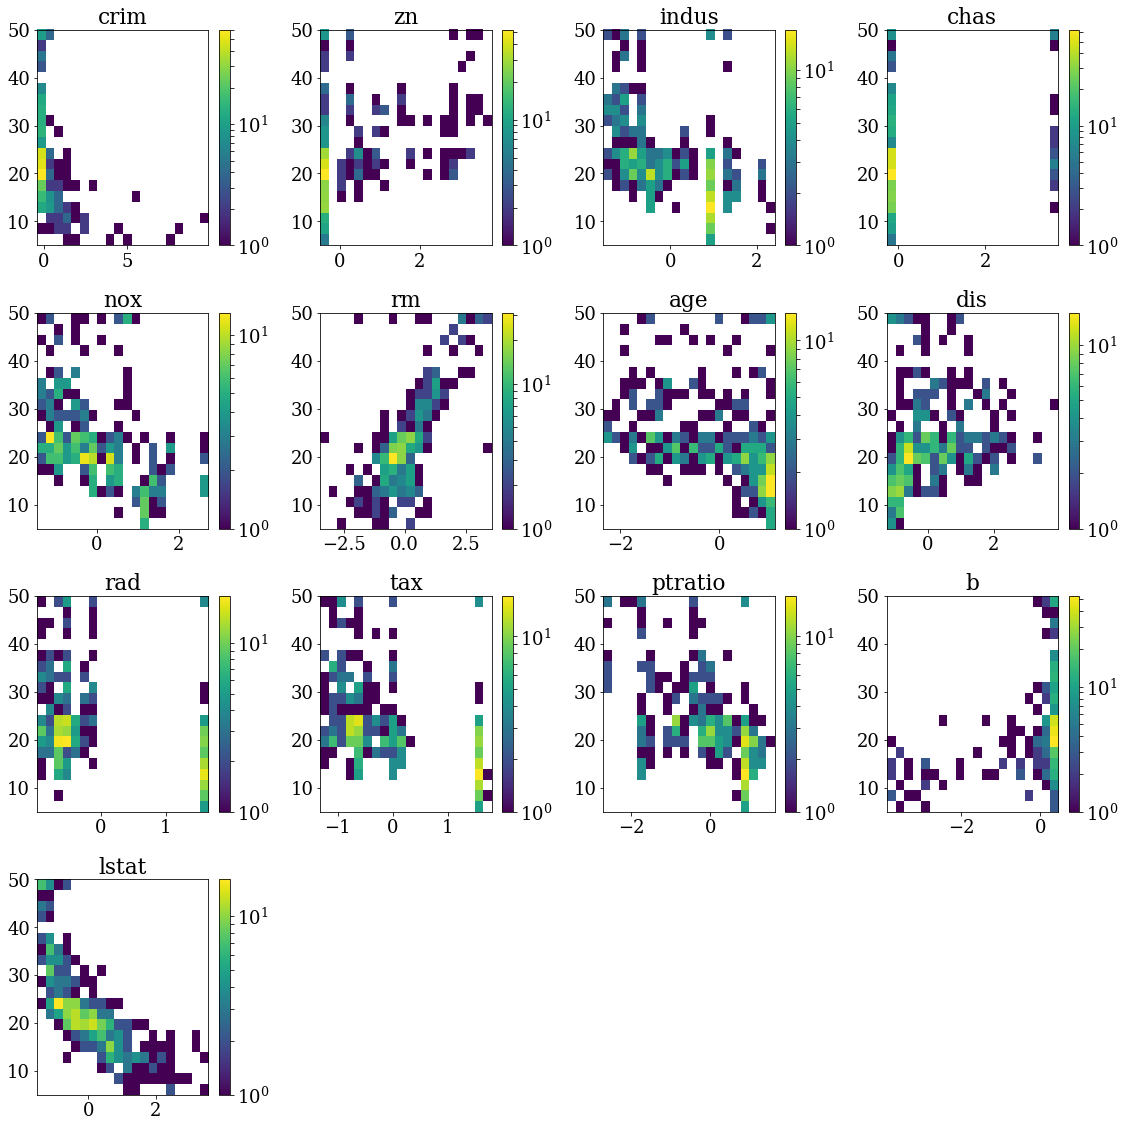

In [14]:
n_rows = 4
n_cols = 4

plt.figure(figsize=(16, 16))

for index, row in enumerate(x_train.transpose()):
    
    plt.subplot(n_rows, n_cols, index+1)
    plt.hist2d(row, y_train, bins=20, norm=LogNorm())
    plt.title(data['feature_names'][index].lower())
    plt.colorbar()
    
plt.tight_layout() 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor

In [16]:
models = [LinearRegression(n_jobs=-1), 
          MLPRegressor(hidden_layer_sizes=(6,2), batch_size=1), 
          RandomForestRegressor(n_estimators=5, n_jobs=-1),
         AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=3)]
model_names = ['linear', 'NN', 'Random Forest', 'boosted-linear']

In [17]:
for model in models:
    model.fit(x_train, y_train)

In [18]:
def r_square(y_true, y_pred):
    return 1-np.sum((y_true-y_pred)**2)/np.sum(y_true**2)

In [19]:
for model in models:
    percent_error = np.mean(np.abs((y_test-model.predict(x_test))/y_test)*100)
    print('Mean Percent Error: %.4f, R-Squared: %.4f' % (percent_error, r_square(y_test, model.predict(x_test))))

Mean Percent Error: 18.7998, R-Squared: 0.9509
Mean Percent Error: 16.4152, R-Squared: 0.9645
Mean Percent Error: 13.8944, R-Squared: 0.9716
Mean Percent Error: 21.2970, R-Squared: 0.9450


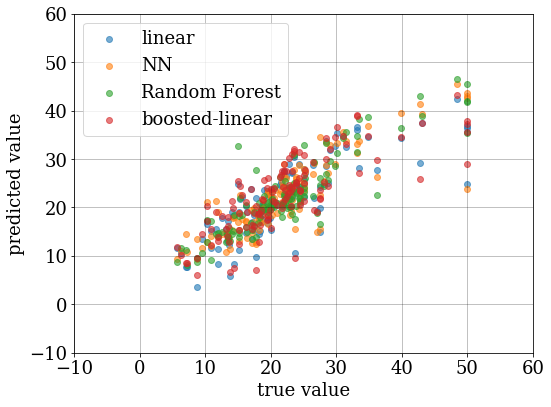

In [20]:
n_pads = len(models)
plt.figure(figsize=(8,6))

for index, model in enumerate(models):
#    plt.subplot(1, n_pads, index+1)
    plt.scatter(y_test, model.predict(x_test), label=model_names[index], alpha=0.6)
    plt.grid(alpha=0.3, color='black')
    plt.xlim([-10, 60])
    plt.ylim([-10, 60])
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.legend()

plt.tight_layout()

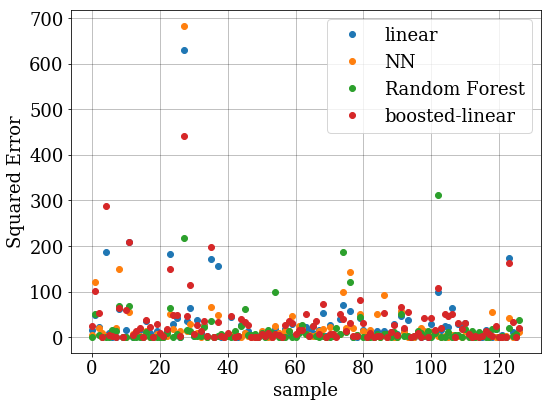

In [21]:
n_pads = len(models)
plt.figure(figsize=(8,6))

for index, model in enumerate(models):
#    plt.subplot(1, n_pads, index+1)
    plt.plot(np.arange(len(y_test)), (y_test-model.predict(x_test))**2, label=model_names[index], marker='o', linestyle='')
    plt.grid(alpha=0.3, color='black')
    plt.xlabel('sample')
    plt.ylabel('Squared Error')
    plt.legend()

plt.tight_layout()

In [22]:
weights = []

for model in models:
    percent_error = np.mean(np.abs((y_test-model.predict(x_test))/y_test)*100)
    weights.append(percent_error)
    
weights = np.array(weights)

In [23]:
def vote(preds, weights):
    return np.sum(preds*weights)/np.sum(weights)/len(weights)

In [24]:
preds = []
for xp in x_test:
    p = []

    for model in models:
        p.append(model.predict(xp.reshape(1,-1)))
        
    preds.append(vote(p, weights))

In [25]:
preds = np.array(preds)

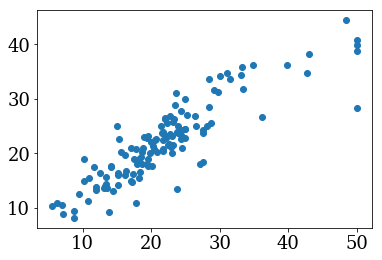

In [26]:
plt.scatter(y_test, preds)

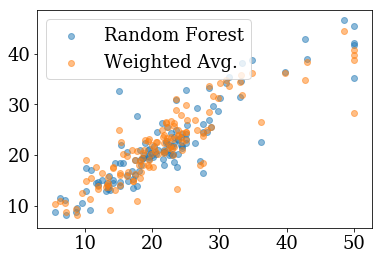

In [27]:
plt.scatter(y_test, models[2].predict(x_test), label=model_names[2], marker='o', alpha=0.5)
plt.scatter(y_test, preds, label='Weighted Avg.', marker='o', alpha=0.5)
plt.legend() 

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
for index, model in enumerate(models):
    print('%s (mse) = %.4f' % (model_names[index], mean_squared_error(y_test, model.predict(x_test))))

linear (mse) = 27.6342
NN (mse) = 19.9756
Random Forest (mse) = 15.9929
boosted-linear (mse) = 30.9364


In [30]:
print('Weighted Avg. = %.4f' % mean_squared_error(y_test, preds))

Weighted Avg. = 18.3494


## Start playing with Monte Carlo methods

In [31]:
from scipy.stats import gaussian_kde

In [32]:
gauss_kde = gaussian_kde(x[:,-1], )

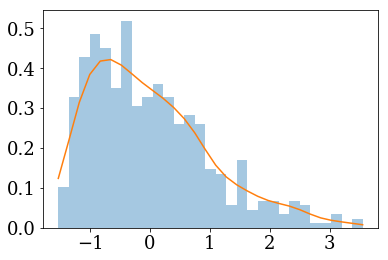

In [33]:
axis = np.linspace(np.min(x[:,-1]), np.max(x[:,-1]), 30)
plt.hist(x[:,-1], bins=axis, normed=True, alpha=0.4)
plt.plot(axis, gauss_kde.evaluate(axis))

In [34]:
fake_data = gauss_kde.resample(size=1000)

In [35]:
fake_data[0]

array([ -5.66475967e-01,  -1.92375339e-01,   8.31444094e-01,
        -3.93761297e-01,  -9.83071889e-02,   1.39892103e+00,
         1.21474241e+00,  -5.71882969e-02,  -5.06260406e-01,
        -7.40694850e-01,   2.44589747e+00,   3.31281793e-01,
         5.86148675e-01,  -5.00347755e-01,   2.89154948e+00,
         5.77633768e-01,  -1.94409759e+00,  -6.80467523e-01,
         3.40337284e-01,   1.58340963e+00,  -1.05188799e+00,
        -1.40889662e-01,  -5.59770195e-01,  -7.01320315e-01,
         8.77229493e-01,   4.31462115e-01,   2.68848701e-02,
        -5.60310052e-01,   1.14864361e+00,  -1.26677805e+00,
        -1.21825780e-02,  -3.00062943e-01,  -1.28841437e+00,
        -1.07572188e+00,  -1.34600254e+00,   4.21370902e-01,
        -1.21907355e+00,  -6.30481195e-01,  -6.84460747e-01,
        -7.96572802e-01,   2.15359396e-01,   1.04374928e+00,
        -1.79760143e-01,  -8.31778122e-01,   1.71279332e+00,
        -1.55068217e+00,  -8.06405649e-02,   2.42669117e+00,
         4.62107177e-01,

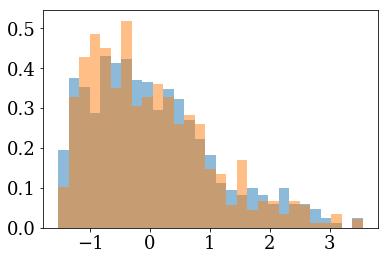

In [36]:
plt.hist(fake_data[0], bins=axis, alpha=0.5, normed=True);
plt.hist(x[:,-1], bins=axis, alpha=0.5, normed=True);

In [37]:
full_pdf = gaussian_kde(x.transpose())

In [38]:
dataset = full_pdf.resample(size=100000)

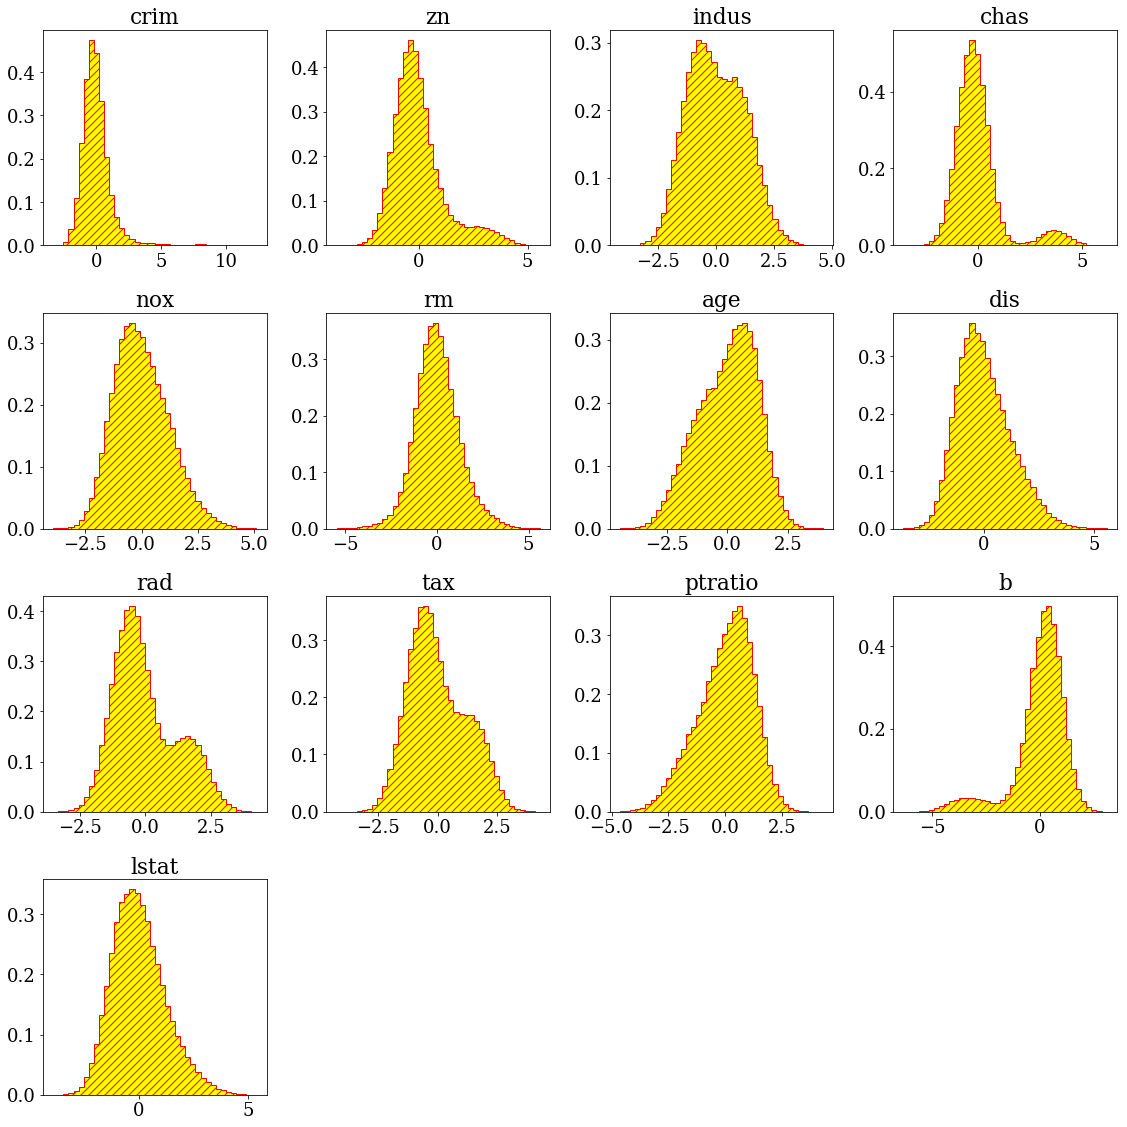

In [42]:
plt.figure(figsize=(16, 16))

for index, row in enumerate(dataset):
    
    plt.subplot(n_rows, n_cols, index+1)
    plt.hist(row, bins=40, normed=True, color='yellow', histtype='stepfilled', hatch='///', edgecolor='red')
    plt.title(data['feature_names'][index].lower())
    
plt.tight_layout() 

In [40]:
dataset.shape

(13, 100000)